## imports

In [58]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from itertools import combinations
from collections import defaultdict
%matplotlib inline

## data

In [21]:
data = pd.read_csv('export-sales-report-20250202.csv')
data.head()

,ResellerOrderId,ProductId,BuyerName,BuyerId,ProductName,UnitName,ResponsibleUserName,ProductSubCategoryName,ProductCategoryName,ProductTypeName,...,Vat,Price,SellType,CreateDate,PersianDate,PersianYear,PersianMonth,PersianMonthName,ColorId,SizeId
0,18941,5132,هتل طوبی,3603,سیب زمینی متوسط دست چین کیلویی,کیلو,سوگل تاجیک,پیاز و سیب زمینی,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,3800000.0,تره بار,2024-03-20 19:07:57.630,1403/01/01,1403,1,فروردین,NaN,NaN
1,18941,9268,هتل طوبی,3603,کدو سبز ( مسمایی ) دستچین کیلویی,کیلو,سوگل تاجیک,صیفی جات,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,1600000.0,تره بار,2024-03-20 19:07:57.630,1403/01/01,1403,1,فروردین,NaN,NaN
2,18941,12377,هتل طوبی,3603,پرتقال تامسون دستچین کیلویی,کیلو,سوگل تاجیک,میوه تازه,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,3600000.0,تره بار,2024-03-20 19:07:57.630,1403/01/01,1403,1,فروردین,NaN,NaN
3,18941,12384,هتل طوبی,3603,خیار گلخانه ای دستچین کیلویی,کیلو,سوگل تاجیک,صیفی جات,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,1200000.0,تره بار,2024-03-20 19:07:57.630,1403/01/01,1403,1,فروردین,NaN,NaN
4,18941,12393,هتل طوبی,3603,قارچ دکمه ای سفید دستچین و تازه کیلویی,کیلو,سوگل تاجیک,قارچ,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,19500000.0,تره بار,2024-03-20 19:07:57.630,1403/01/01,1403,1,فروردین,NaN,NaN


In [22]:
type(data['PersianDate'][0])

str

In [23]:
import pandas as pd


data["PersianDate"] = data["PersianDate"].str.split("/").str[1] + data["PersianDate"].str.split("/").str[2]

data.head()


,ResellerOrderId,ProductId,BuyerName,BuyerId,ProductName,UnitName,ResponsibleUserName,ProductSubCategoryName,ProductCategoryName,ProductTypeName,...,Vat,Price,SellType,CreateDate,PersianDate,PersianYear,PersianMonth,PersianMonthName,ColorId,SizeId
0,18941,5132,هتل طوبی,3603,سیب زمینی متوسط دست چین کیلویی,کیلو,سوگل تاجیک,پیاز و سیب زمینی,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,3800000.0,تره بار,2024-03-20 19:07:57.630,0101,1403,1,فروردین,NaN,NaN
1,18941,9268,هتل طوبی,3603,کدو سبز ( مسمایی ) دستچین کیلویی,کیلو,سوگل تاجیک,صیفی جات,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,1600000.0,تره بار,2024-03-20 19:07:57.630,0101,1403,1,فروردین,NaN,NaN
2,18941,12377,هتل طوبی,3603,پرتقال تامسون دستچین کیلویی,کیلو,سوگل تاجیک,میوه تازه,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,3600000.0,تره بار,2024-03-20 19:07:57.630,0101,1403,1,فروردین,NaN,NaN
3,18941,12384,هتل طوبی,3603,خیار گلخانه ای دستچین کیلویی,کیلو,سوگل تاجیک,صیفی جات,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,1200000.0,تره بار,2024-03-20 19:07:57.630,0101,1403,1,فروردین,NaN,NaN
4,18941,12393,هتل طوبی,3603,قارچ دکمه ای سفید دستچین و تازه کیلویی,کیلو,سوگل تاجیک,قارچ,میوه، سبزیجات و صیفی جات,مواد غذایی,...,0,19500000.0,تره بار,2024-03-20 19:07:57.630,0101,1403,1,فروردین,NaN,NaN


### data procces

In [24]:
lst = data['PersianDate'].to_list()

In [25]:
for i in lst :
    date_str = i
    day_month = "".join(date_str.split("/")[1:])  # فقط ماه و روز را جدا کن


## grouping

In [75]:
grouped = data.groupby(["PersianDate", "BuyerId"])["ProductId"].apply(list).reset_index()
print(grouped)

     PersianDate  BuyerId                                          ProductId
0           0101     3603  [5132, 9268, 12377, 12384, 12393, 12395, 12401...
1           0101     5351  [16735, 16276, 16322, 17059, 17183, 17295, 135...
2           0102     5351                                            [14136]
3           0102     5375                              [16955, 16317, 12403]
4           0103       50  [10211, 12404, 12394, 12401, 12377, 11326, 111...
...          ...      ...                                                ...
3229        1114       50                               [13878, 5562, 10059]
3230        1114     1052  [14048, 14065, 12648, 15827, 5132, 9268, 9275,...
3231        1114     5210                       [18426, 13456, 16354, 13475]
3232        1114     5501  [18330, 18653, 19733, 10678, 17665, 16194, 12886]
3233        1114     5513                                            [13897]

[3234 rows x 3 columns]


## co-occurrence matrix

In [ ]:
co_occurrence = defaultdict(lambda: defaultdict(int))

for _, row in grouped.iterrows():
    items = row["ProductId"]
    for item1, item2 in combinations(items, 2):
        co_occurrence[item1][item2] += 1
        co_occurrence[item2][item1] += 1 

co_matrix = pd.DataFrame(co_occurrence).fillna(0)

In [31]:
print(co_matrix)

       5132   9268   12377  12384  12393  12395  12401  12408  16700  16708  \
9268   200.0   12.0   39.0  140.0  267.0   95.0  248.0  162.0    3.0    5.0   
12377   39.0   39.0    4.0   40.0  100.0   29.0   80.0   36.0    1.0    6.0   
12384  170.0  140.0   40.0    8.0  176.0   97.0  206.0  120.0    4.0   10.0   
12393  306.0  267.0  100.0  176.0   16.0  243.0  487.0  213.0    5.0   12.0   
12395  136.0   95.0   29.0   97.0  243.0   10.0  150.0   63.0    6.0   10.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
19716    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19203    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19737    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19710    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19891    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  19387  21012  11     13991  19927  2205

### pearson method

In [34]:
import pandas as pd

# فرض: df ماتریس آیتم-آیتم شماست که مقدار هر سلول، تعداد خریدهای مشترک است
item_correlation = co_matrix.corr(method='pearson')  # یا method='spearman'

# نمایش 10 آیتمی که بیشترین همبستگی را با یک کالا دارند
target_item = 12377  # شناسه کالا مورد نظر
top_related_items = item_correlation[target_item].sort_values(ascending=False)[1:11]
top_related_items


11110    0.921949
11101    0.920019
5116     0.916096
9276     0.913203
11132    0.911801
18540    0.911303
12403    0.904425
14048    0.903688
12404    0.902632
11194    0.900722
Name: 12377, dtype: float64

In [38]:
import pandas as pd

df_corr = top_related_items.reset_index()
df_corr.columns = ['ProductId', 'correlation']
df_corr

,ProductId,correlation
0,11110,0.921949
1,11101,0.920019
2,5116,0.916096
3,9276,0.913203
4,11132,0.911801
5,18540,0.911303
6,12403,0.904425
7,14048,0.903688
8,12404,0.902632
9,11194,0.900722


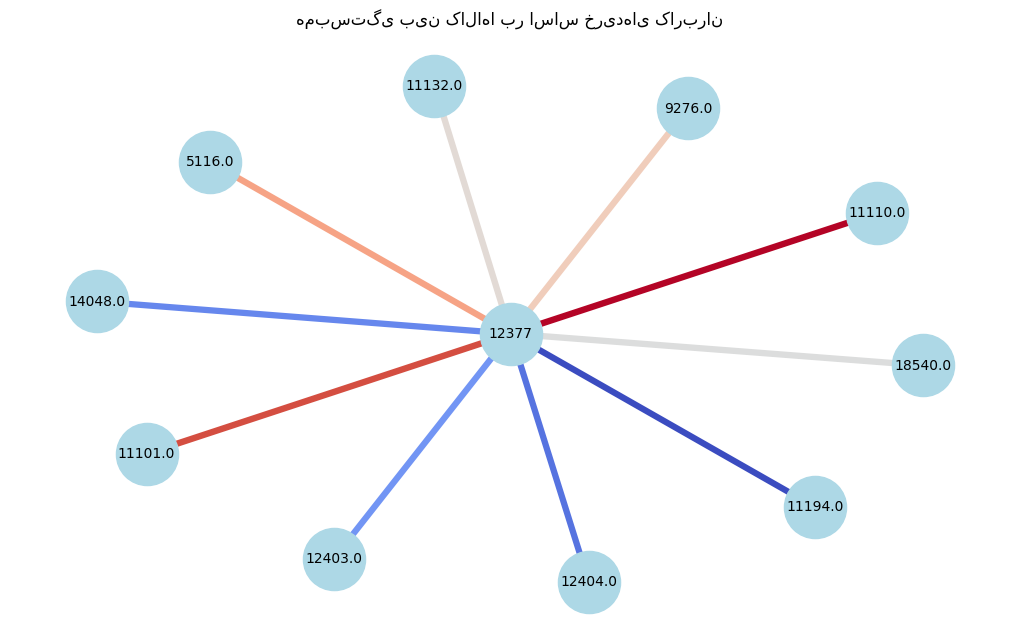

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# ایجاد گراف
G = nx.Graph()

# اضافه کردن یال‌ها (روابط بین کالاها)
for _, row in df_corr.iterrows():
    product = row['ProductId']
    correlation = row['correlation']
    G.add_edge('12377', product, weight=correlation)  # فرض می‌کنیم کالا 12377 مبدا است

# تنظیم اندازه یال‌ها بر اساس وزن همبستگی
edges = G.edges(data=True)
weights = [d['weight'] * 5 for (_, _, d) in edges]  # بزرگ‌تر کردن یال برای نمایش بهتر

# تنظیم رنگ یال‌ها بر اساس میزان همبستگی (میزان شدت رنگ)
edge_colors = [d['weight'] for (_, _, d) in edges]

# رسم گراف
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # نوع چیدمان گراف
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors,
        width=weights, edge_cmap=plt.cm.coolwarm, node_size=2000, font_size=10)

plt.title("همبستگی بین کالاها بر اساس خریدهای کاربران")
plt.show()


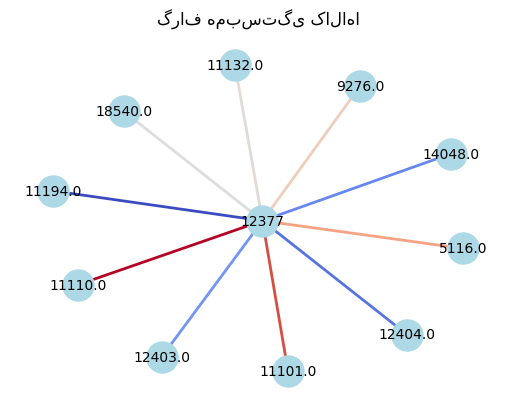

In [43]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


# فرض کنید کالای هدف ما شناسه 12377 باشد
target_product = 12377

# ساخت گراف
G = nx.Graph()

# اضافه کردن گره هدف
G.add_node(target_product)

# اضافه کردن گره‌های مربوط به کالاهای مرتبط و یال‌ها با وزن (ضریب همبستگی)
for idx, row in df_corr.iterrows():
    product = row['ProductId']
    corr_value = row['correlation']
    G.add_node(product)
    G.add_edge(target_product, product, weight=corr_value)

# استخراج وزن‌ها (برای رنگ‌آمیزی یال‌ها)
weights = [G[u][v]['weight'] for u, v in G.edges()]

# نرمال کردن وزن‌ها به بازه [0, 1] جهت استفاده از colormap
min_w, max_w = min(weights), max(weights)
norm_weights = [(w - min_w) / (max_w - min_w) for w in weights]

# استفاده از colormap برای تعیین رنگ یال‌ها؛ در اینجا از colormap 'coolwarm' استفاده می‌شود
edge_colors = [plt.cm.coolwarm(w) for w in norm_weights]

# محاسبه موقعیت گره‌ها به کمک spring layout
pos = nx.spring_layout(G)

# رسم گره‌ها
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# رسم برچسب گره‌ها (نمایش شناسه کالا)
nx.draw_networkx_labels(G, pos, font_size=10)

# رسم یال‌ها با رنگ‌بندی بر اساس شدت همبستگی
nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors)

plt.title("گراف همبستگی کالاها")
plt.axis("off")
plt.show()


### jaccard_similarity matrix

In [32]:
import numpy as np

def jaccard_similarity(matrix):
    items = matrix.columns
    jac_sim = pd.DataFrame(np.zeros((len(items), len(items))), index=items, columns=items)
    
    for i in items:
        for j in items:
            if i == j:
                jac_sim.loc[i, j] = 1.0
            else:
                intersection = matrix.loc[i, j]
                union = matrix.loc[i].sum() + matrix.loc[j].sum() - intersection
                jac_sim.loc[i, j] = intersection / union if union > 0 else 0
    
    return jac_sim

jaccard_matrix = jaccard_similarity(co_matrix)
print(jaccard_matrix)

KeyboardInterrupt: 

## matrix

In [46]:
unique_dates = grouped['PersianDate'].unique()
unique_dates

array(['0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108',
       '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116',
       '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124',
       '0125', '0126', '0127', '0128', '0129', '0130', '0131', '0201',
       '0202', '0203', '0204', '0205', '0206', '0207', '0208', '0209',
       '0210', '0211', '0212', '0213', '0214', '0215', '0216', '0217',
       '0218', '0219', '0220', '0221', '0222', '0223', '0224', '0225',
       '0226', '0227', '0228', '0229', '0230', '0231', '0301', '0302',
       '0303', '0304', '0305', '0306', '0307', '0308', '0309', '0310',
       '0311', '0312', '0313', '0314', '0315', '0316', '0317', '0318',
       '0319', '0320', '0321', '0322', '0323', '0324', '0325', '0326',
       '0327', '0328', '0329', '0330', '0331', '0401', '0402', '0403',
       '0404', '0405', '0406', '0407', '0408', '0409', '0410', '0411',
       '0412', '0413', '0414', '0415', '0416', '0417', '0418', '0419',
      

In [52]:
unique_products = data['ProductId'].unique()
unique_products.shape

(2914,)

In [53]:
unique_buyers = grouped['BuyerId'].unique()

In [62]:
buyer_matrices = {}
for buyer in unique_buyers:
    buyer_df = grouped[grouped['BuyerId'] == buyer]
    matrix = pd.DataFrame(0, index=unique_products, columns=unique_dates)
    
    for _, row in buyer_df.iterrows():
        date = row['PersianDate']
        products = row['ProductId']
        for product in products:
            matrix.at[product, date] = 1
    
    buyer_matrices[buyer] = matrix

In [65]:
buyer_matrix = buyer_matrices[50]
print("Matrix for BuyerId 5351:")
print(buyer_matrix)

Matrix for BuyerId 5351:
       0101  0102  0103  0104  0105  0106  0107  0108  0109  0110  ...  1105  \
5132      0     0     0     0     1     0     0     0     0     0  ...     0   
9268      0     0     0     1     1     0     0     1     0     1  ...     0   
12377     0     0     1     0     0     0     1     1     1     0  ...     0   
12384     0     0     0     0     0     0     0     0     0     0  ...     0   
12393     0     0     0     0     0     0     0     1     1     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
22045     0     0     0     0     0     0     0     0     0     0  ...     0   
19845     0     0     0     0     0     0     0     0     0     0  ...     0   
19440     0     0     0     0     0     0     0     0     0     0  ...     0   
11        0     0     0     0     0     0     0     0     0     0  ...     0   
22052     0     0     0     0     0     0     0     0     0     0  ...     0   

       1106  1

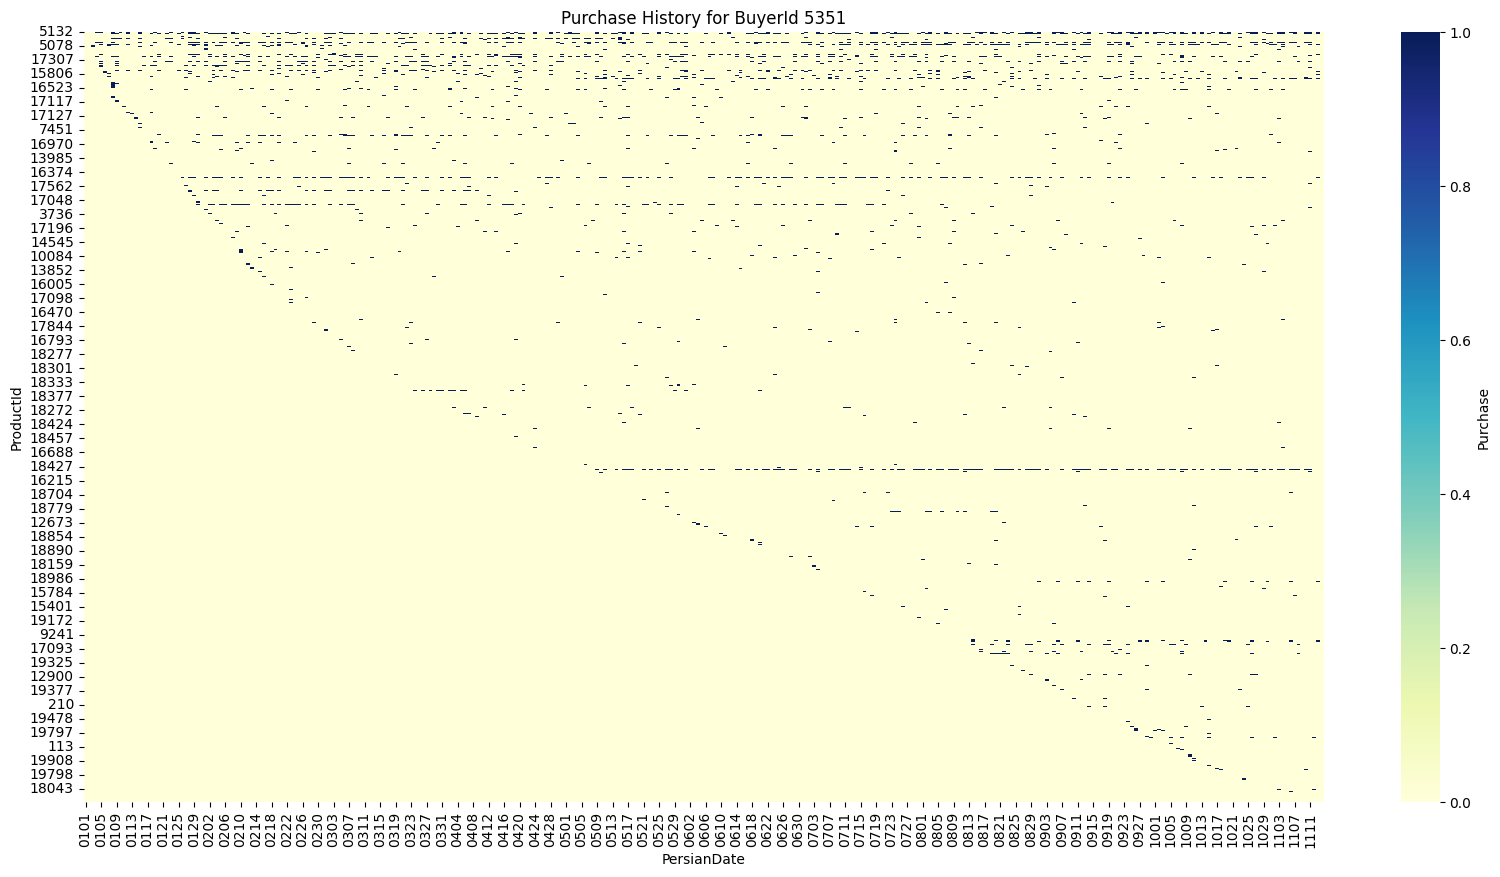

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(buyer_matrix, cmap="YlGnBu", cbar_kws={'label': 'Purchase'})
plt.title('Purchase History for BuyerId 5351')
plt.xlabel('PersianDate')
plt.ylabel('ProductId')
plt.show()

## apriori

In [72]:
from mlxtend.frequent_patterns import apriori, association_rules

In [69]:
ap_df = grouped[grouped['BuyerId'] == 50]

In [71]:
print(ap_df)

     PersianDate  BuyerId                                          ProductId
4           0103       50  [10211, 12404, 12394, 12401, 12377, 11326, 111...
9           0104       50  [15726, 14063, 5116, 9268, 10211, 9276, 11101,...
14          0105       50  [14970, 17049, 5604, 15776, 5759, 5132, 5482, ...
20          0106       50  [11345, 6468, 16096, 16097, 904, 922, 928, 13449]
22          0107       50  [12711, 965, 11240, 963, 12467, 12468, 12404, ...
...          ...      ...                                                ...
3186        1110       50  [11336, 6562, 10467, 19920, 19727, 17597, 2204...
3202        1111       50  [17808, 17752, 13583, 8559, 17177, 13567, 6529...
3211        1112       50                              [19683, 19685, 19679]
3217        1113       50  [13475, 19263, 19264, 19265, 19260, 19262, 192...
3229        1114       50                               [13878, 5562, 10059]

[282 rows x 3 columns]


In [76]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# فرض می کنیم دیتا فریم شما df نام دارد.
transactions = ap_df['ProductId'].tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print(rules)

MemoryError: Unable to allocate 42.0 GiB for an array with shape (31991346, 5, 282) and data type bool

In [74]:

# آماده‌سازی داده‌ها برای الگوریتم Apriori
transactions = ap_df['ProductId'].tolist()

all_products = sorted(set(item for sublist in transactions for item in sublist))
onehot_encoded_data = []
for transaction in transactions:
    onehot_encoded_data.append([1 if product in transaction else 0 for product in all_products])

onehot_df = pd.DataFrame(onehot_encoded_data, columns=all_products)

# اجرای الگوریتم Apriori
frequent_itemsets = apriori(onehot_df, min_support=0.1, use_colnames=True)

# استخراج قوانین انجمنی
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# نمایش قوانین
print("Association rules:")
print(rules)

# ذخیره قوانین در دیتافریم جدید
rules_df = pd.DataFrame(rules)
print("Rules DataFrame:")
print(rules_df)

# محاسبه احتمال سفارش
def predict_next_purchase(basket, rules, all_products):
    basket_encoded = [1 if product in basket else 0 for product in all_products]
    basket_series = pd.Series(basket_encoded, index=all_products)

    predictions = []
    for _, rule in rules.iterrows():
        antecedents = rule['antecedents']
        consequents = rule['consequents']
        confidence = rule['confidence']

        if all(basket_series[p] for p in antecedents):
            predictions.append((consequents, confidence))

    return predictions

# مثال: پیش‌بینی خرید بعدی برای سبد خرید [10211, 12404]
basket = [10211, 12404]
predictions = predict_next_purchase(basket, rules, all_products)

print("Predictions for next purchase:")
for consequent, confidence in predictions:
    print(f"Product(s) {consequent} with confidence {confidence:.2f}")

c:\Users\Aliak\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules:
                       antecedents            consequents  antecedent support  \
0                           (4384)                 (5076)            0.173759   
1                           (4384)                (12393)            0.173759   
2                           (4384)                (12401)            0.173759   
3                           (4384)                (12404)            0.173759   
4                           (4384)                (14063)            0.173759   
...                            ...                    ...                 ...   
9196  (12393, 12401, 12403, 12404)         (12394, 14063)            0.163121   
9197  (12394, 12403, 12404, 14063)         (12393, 12401)            0.184397   
9198  (12401, 12394, 12403, 12404)         (12393, 14063)            0.198582   
9199  (12401, 12403, 12404, 14063)         (12393, 12394)            0.202128   
9200         (12393, 12403, 12404)  (12401, 12394, 14063)            0.205674   

      co